# Package installation

In [1]:
import pandas as pd
import numpy as np
import math as ma
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


# Data Cleaning

In [2]:
# load 3 datasets and change the format of date to %Y-%m
# Data
Data = pd.read_csv('Data.csv', header=0)
Data['date'] = pd.to_datetime(Data['date'], format='%Y%m%d')
Data['date'] = Data['date'].dt.strftime('%Y-%m')

# SP_500
SP_500 = pd.read_csv('SP500.csv')
SP_500['Date'] = pd.to_datetime(SP_500['Date'], format='%Y%m')
SP_500['Date'] = SP_500['Date'].dt.strftime('%Y-%m')
SP_500 = SP_500.set_index('Date')

# Capital IQ
Capital_IQ = pd.read_csv('CapitalIQ.csv')
Capital_IQ['Date'] = pd.to_datetime(Capital_IQ['Date'], format='%Y%m%d')
Capital_IQ['Date'] = Capital_IQ['Date'].dt.strftime('%Y-%m')
Capital_IQ = Capital_IQ.set_index('Date')


In [3]:
# set unique gvkey and date index so that we will not overlap numbers

gvkey = Data['gvkey'].unique()
gvkey.sort()
date = Data['date'].unique()
date.sort()

# create pivot tables for each column name that including all elements of the Data_CSV. We could call value up with keys
col_names = Data.columns
pivot = {}

for col in col_names:
    pivot_df = Data.pivot(index='date', columns='gvkey', values=col)
    time = (pivot_df.index >='1970-01') & (pivot_df.index <='2019-12')
    pivot_df = pivot_df[time]
    pivot[col] = pivot_df



# Factor replication

In [4]:
# Price_Momentum factor:
prccm = pivot['prccm']
prchm = pivot['prchm']
prclm = pivot['prclm']
Price_Momentum = (prchm-prccm)/(prccm-prclm)
Price_Momentum.replace([np.inf, -np.inf], np.nan, inplace=True)
Price_Momentum

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,14.000000,NaN,15.000000,NaN,NaN,NaN,2.411765,5.500000,11.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,7.666667,NaN,NaN,NaN
1970-02,0.066667,NaN,0.111111,5.538462,0.028169,NaN,0.000000,1.000000,0.043478,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,0.037037,NaN,NaN,NaN
1970-03,0.571429,NaN,0.090909,0.354839,2.181818,NaN,0.081967,0.428571,0.818182,0.833333,...,NaN,NaN,NaN,NaN,NaN,1.181818,NaN,NaN,NaN,NaN
1970-04,2.000000,NaN,1.461538,3.714286,3.555556,NaN,1.217391,NaN,23.000000,2.350000,...,NaN,NaN,NaN,NaN,NaN,9.500000,NaN,NaN,NaN,NaN
1970-05,2.304348,NaN,0.285714,2.727273,0.317073,NaN,15.250000,1.583333,2.222222,1.333333,...,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,2.045673,NaN,0.271084,NaN,0.099332,0.691919,...,1.377301,9.780105,3.158915,1.284404,2.345382,NaN,NaN,0.816990,2.514970,4.122449
2019-09,NaN,NaN,NaN,NaN,3.303922,NaN,17.100000,NaN,0.256367,1.041509,...,0.153430,0.066961,2.181892,1.717033,17.200000,NaN,NaN,0.067992,0.117581,0.376518
2019-10,NaN,NaN,NaN,NaN,0.290090,NaN,0.032862,NaN,1.650485,0.227451,...,2.349476,0.639535,0.103343,0.139875,0.105750,NaN,NaN,0.301685,0.062925,0.094527


In [5]:
# Expected LTG factor
LTG = pivot['LTG']
LTG

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,15.49,NaN,NaN,NaN,5.05,11.81,...,13.42,5.43,14.37,NaN,20.23,NaN,NaN,6.33,8.26,7.30
2019-09,NaN,NaN,NaN,NaN,15.49,NaN,NaN,NaN,5.05,11.81,...,13.42,5.43,14.37,NaN,20.23,NaN,NaN,6.33,7.89,7.30
2019-10,NaN,NaN,NaN,NaN,12.87,NaN,NaN,NaN,5.05,11.61,...,12.01,5.43,14.27,9.6,20.23,NaN,NaN,3.63,7.48,4.40


In [15]:
# Long-term momentum
trt1m = pivot['trt1m']
MoM = trt1m.rolling(11, min_periods=1).apply(np.nanmean).shift(2)
MoM

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03,-5.357100,NaN,-4.7297,-18.032800,-22.764200,NaN,8.636400,0.000000,-8.093600,-4.215700,...,NaN,NaN,NaN,NaN,NaN,2.857100,-1.25000,NaN,NaN,NaN
1970-04,-0.144850,NaN,7.8479,-14.416400,1.933700,NaN,9.757550,-2.205900,3.049950,-0.309900,...,NaN,NaN,NaN,NaN,NaN,0.734100,3.95125,NaN,NaN,NaN
1970-05,0.682667,NaN,6.0256,-7.633533,-2.058133,NaN,14.806933,0.067867,1.468333,-1.253433,...,NaN,NaN,NaN,NaN,NaN,1.144167,3.95125,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,-0.719064,NaN,1.633282,NaN,1.737027,2.541327,...,1.362682,-4.891555,-1.360645,0.684073,1.023382,NaN,NaN,-1.428618,3.164200,-0.266573
2019-09,NaN,NaN,NaN,NaN,-1.543600,NaN,2.920518,NaN,1.743482,2.719891,...,1.050809,-5.455427,-1.204018,1.167827,-0.102018,NaN,NaN,-1.849445,1.954482,-0.489391
2019-10,NaN,NaN,NaN,NaN,-2.956145,NaN,3.977836,NaN,2.078182,1.647327,...,0.187064,-7.299736,-1.930073,1.918164,-1.162945,NaN,NaN,-1.787645,0.945118,-1.849636


In [7]:
# Book to Price
ceqq = pivot['ceqq']
cshoq = pivot['cshoq']
Book_to_Price = ceqq / (cshoq*prccm)
Book_to_Price

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,0.736925,NaN,0.571365,NaN,0.867679,NaN,1.124589,1.370687,NaN,0.237035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02,0.710128,NaN,0.479539,NaN,0.689786,NaN,1.014252,1.433950,NaN,0.228807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03,0.693907,NaN,0.468387,NaN,0.766786,NaN,0.772810,1.380841,NaN,0.236226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04,NaN,NaN,NaN,NaN,NaN,NaN,0.830519,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05,NaN,NaN,NaN,NaN,NaN,NaN,0.849834,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,-0.001878,NaN,0.884131,NaN,0.488908,0.210127,...,0.209749,0.580499,0.297687,0.304132,0.337944,NaN,NaN,0.374068,0.073417,0.740693
2019-09,NaN,NaN,NaN,NaN,-0.001832,NaN,1.337446,NaN,0.480044,0.214271,...,0.201819,0.461808,0.292377,0.299887,0.353031,NaN,NaN,0.323521,0.068190,0.680873
2019-10,NaN,NaN,NaN,NaN,0.012151,NaN,1.262852,NaN,0.525124,0.215182,...,0.208951,0.510482,0.292712,0.306559,0.325415,NaN,NaN,0.263754,0.063462,0.657976


In [37]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


rm_rf = SP_500['ret_sp500'] - SP_500['rf']
r_rf = trt1m.sub(SP_500['rf'].values, axis=0)

beta = pd.DataFrame(columns=r_rf.columns)
firms = r_rf.columns
for firm in firms:
    if r_rf[firm].isnull().all():
        continue
    endog = r_rf[firm] / 100
    exog = sm.add_constant(rm_rf)
    rols = RollingOLS(endog, exog, window=48)
    rres = rols.fit()
    params = rres.params[0].copy()
    beta[firm] = params

In [8]:
# CAPM Beta
trt1m = pivot['trt1m']
ret_sp500 = SP_500['ret_sp500']
rf = SP_500['rf']

firm_risk = trt1m.sub(rf,axis=0)
mkt_risk = ret_sp500.sub(rf,axis=0)

def betaf(xx):
    if firm_risk[xx].isna().sum() != 600:
        model = RollingOLS(firm_risk[xx]/100, mkt_risk, window=48)
        result = model.fit()
        params = result.params.copy()
        return params[47:]

beta = pd.DataFrame(columns=gvkey)

for i in gvkey:
    beta[i] = betaf(i)



/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/a

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/a

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyan

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/a

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyang

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyan

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyang

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyan

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyang

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:272: RuntimeWarning: divide by zero encountered in log
  llf = -np.log(ssr) * nobs2  # concentrated likelihood
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: invalid value encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/rolling.py:255: RuntimeWarning: divide by zero encountered in double_scalars
  s2 = ssr / (nobs - tot_params)
/Users/yuyangchen/opt/an

In [51]:
beta = beta.fillna(value=np.nan)
beta.iloc[47:]

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
Date,,,,,,,,,,,,,,,,,,,,,
1973-12,1.206566,NaN,1.607961,1.997493,2.042535,NaN,-0.638500,2.031554,1.167248,0.842281,...,NaN,NaN,NaN,NaN,NaN,1.156864,0.772148,NaN,NaN,NaN
1974-01,1.243493,NaN,1.681829,1.990276,1.958875,NaN,-0.674940,2.223388,1.160136,0.864377,...,NaN,NaN,NaN,NaN,NaN,1.394050,NaN,NaN,NaN,NaN
1974-02,1.265111,NaN,1.604225,2.124190,1.821327,NaN,-0.744771,2.301835,1.106519,0.864452,...,NaN,NaN,NaN,NaN,NaN,1.557034,NaN,NaN,NaN,NaN
1974-03,1.272052,NaN,1.602510,2.102105,1.827261,NaN,-0.757313,2.290029,1.115181,0.854889,...,NaN,NaN,NaN,NaN,NaN,1.551024,NaN,NaN,NaN,NaN
1974-04,1.365086,NaN,1.744604,2.092418,1.884540,NaN,-0.866451,1.961644,1.204042,0.842479,...,NaN,NaN,NaN,NaN,NaN,1.778243,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,1.902596,NaN,-0.086141,NaN,0.075982,1.114190,...,1.196403,0.945453,1.241468,1.713138,0.905107,NaN,NaN,1.480566,1.195367,1.724735
2019-09,NaN,NaN,NaN,NaN,1.942450,NaN,-0.125713,NaN,0.116984,1.054146,...,1.217056,0.977726,1.212108,1.738997,0.869656,NaN,NaN,1.512191,1.200320,1.743118
2019-10,NaN,NaN,NaN,NaN,1.891888,NaN,-0.121835,NaN,0.137428,1.014356,...,1.205928,1.188686,0.874150,1.700018,0.979490,NaN,NaN,1.512761,1.180028,1.751691


In [10]:
# Log Market Cap

cshom = pivot['cshom']
LogMktCap = np.log(cshom.multiply(prccm))
LogMktCap

/Users/yuyangchen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,23.184143,NaN,19.362861,NaN,23.093855,25.739183,...,23.347356,22.109224,22.293076,23.590044,23.334913,NaN,NaN,23.979103,22.919302,21.954732
2019-09,NaN,NaN,NaN,NaN,23.208919,NaN,19.261669,NaN,23.112152,25.719655,...,23.385894,22.337962,22.311076,23.604102,23.291238,NaN,NaN,24.124279,22.993165,22.038943
2019-10,NaN,NaN,NaN,NaN,23.301057,NaN,19.319059,NaN,23.081291,25.718937,...,23.348400,22.272860,22.354583,23.614237,23.426457,NaN,NaN,24.126846,23.101152,22.084396


In [11]:
# volatility : 12M Realized Price volatility

r = np.log(prccm.divide(prccm.shift(1))) 
# replace inf and -inf with nan since we applied divide function
r.replace([np.inf, -np.inf], np.nan, inplace=True) 

part2 = r.pow(2).rolling(13, min_periods=1).sum().divide(11)
AnnVol12M = part2.pow(0.5).multiply(ma.sqrt(12))
AnnVol12M




gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02,0.038688,NaN,0.182995,0.127600,0.239642,NaN,0.107858,0.047127,0.138626,0.036898,...,NaN,NaN,NaN,NaN,NaN,0.029424,0.09147,NaN,NaN,NaN
1970-03,0.045599,NaN,0.184638,0.141084,0.263904,NaN,0.256098,0.061439,0.139771,0.049721,...,NaN,NaN,NaN,NaN,NaN,0.035757,0.09147,NaN,NaN,NaN
1970-04,0.094455,NaN,0.202062,0.349863,0.291426,NaN,0.266916,0.549957,0.161598,0.079810,...,NaN,NaN,NaN,NaN,NaN,0.082088,0.09147,NaN,NaN,NaN
1970-05,0.198408,NaN,0.204799,0.422499,0.291629,NaN,0.267994,0.597305,0.172406,0.133908,...,NaN,NaN,NaN,NaN,NaN,0.138694,0.09147,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08,NaN,NaN,NaN,NaN,0.508504,NaN,0.279396,NaN,0.146438,0.200514,...,0.339113,0.608394,0.441354,0.317078,0.330664,NaN,NaN,0.342352,0.287028,0.376980
2019-09,NaN,NaN,NaN,NaN,0.508570,NaN,0.274083,NaN,0.145599,0.200502,...,0.341377,0.647623,0.436414,0.316725,0.307868,NaN,NaN,0.373966,0.288773,0.386232
2019-10,NaN,NaN,NaN,NaN,0.520584,NaN,0.280439,NaN,0.148890,0.175359,...,0.339486,0.648405,0.434045,0.298652,0.333202,NaN,NaN,0.360434,0.309434,0.387520


# Sorting Stocks into Quintiles (Top:4, Bottom:0)


In [16]:
factors_data = {'HL1M':Price_Momentum , 'LTG':LTG, 'MOM':MoM, 'BP':Book_to_Price, 'Beta':beta, 'LogMCap':LogMktCap, 'AnnVol12M':AnnVol12M}
final_results = {}

In [19]:
start_point = '1970-01'
trt1m_new = Data.pivot(index = 'date', columns = 'gvkey', values = 'trt1m').loc[start_point:'2020-01'] 
#因为最后t+1 会到2020-01，所以要创建一个新的对应的return表

In [29]:
trt1m_new

gvkey,1010,1013,1040,1043,1045,1057,1062,1070,1075,1078,...,189491,198058,199356,260774,260778,265975,266101,294524,316056,326688
date,,,,,,,,,,,,,,,,,,,,,
1970-01,-5.3571,NaN,-4.7297,-18.0328,-22.7642,NaN,8.6364,0.0000,-8.0936,-4.2157,...,NaN,NaN,NaN,NaN,NaN,2.8571,-1.2500,NaN,NaN,NaN
1970-02,5.0674,NaN,20.4255,-10.8000,26.6316,NaN,10.8787,-4.4118,14.1935,3.5959,...,NaN,NaN,NaN,NaN,NaN,-1.3889,9.1525,NaN,NaN,NaN
1970-03,2.3377,NaN,2.3810,5.9322,-10.0418,NaN,24.9057,4.6154,-1.6949,-3.1405,...,NaN,NaN,NaN,NaN,NaN,1.9643,NaN,NaN,NaN,NaN
1970-04,-7.6142,NaN,-7.5581,-26.4000,-11.1628,NaN,-6.9486,-40.7408,-6.2299,-5.4266,...,NaN,NaN,NaN,NaN,NaN,-6.8301,NaN,NaN,NaN,NaN
1970-05,-14.0660,NaN,-2.0126,-19.2754,1.8848,NaN,-1.3636,-20.0000,-5.5901,-9.7826,...,NaN,NaN,NaN,NaN,NaN,-8.6466,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09,NaN,NaN,NaN,NaN,2.5086,NaN,-9.6241,NaN,1.8466,-1.9339,...,3.9290,25.7013,1.8163,1.4157,-4.2735,NaN,NaN,16.9811,7.9464,8.7858
2019-10,NaN,NaN,NaN,NaN,11.4572,NaN,5.9068,NaN,-3.0390,0.3107,...,-3.3785,-6.3028,4.4467,1.0187,14.4423,NaN,NaN,0.2571,11.9537,5.4220
2019-11,NaN,NaN,NaN,NaN,-4.0585,NaN,-4.0848,NaN,-6.3191,2.2007,...,1.0692,19.5365,-21.0396,6.4799,8.5873,NaN,NaN,4.3367,3.4385,7.1552


In [20]:
factor_keys = ['HL1M','LTG','MOM', 'BP', 'Beta', 'LogMCap', 'AnnVol12M']

In [30]:

def find_factor_return(factor_transposed):
    #example: find_factor_return(HL1M_transposed)
    
    
    factor_return = pd.Series() #创建一个存放结果的series
    
    for i in range(len(factor_transposed.columns)):
        t = factor_transposed.columns[i] 
        each_period = factor_transposed.loc[:,t].sort_values(ascending = False)
        #拿出transpose之后的每一个column， 也就是在t时间所有公司的这个factor的数据，然后sort
        
        selected = each_period[~ each_period.isin([np.nan, np.inf, -np.inf, 0])] #去掉正负无穷，去掉nan，去掉0
    
        top_20_percent = selected[:int(len(selected)*0.2)]
        bottom_20_percent = selected[int(len(selected)*0.8):]
    
        R_winner = trt1m_new.loc[t].loc[top_20_percent.index].mean()
        R_loser = trt1m_new.loc[t].loc[bottom_20_percent.index].mean()
    
        QSpread = R_winner - R_loser
    
        factor_return.loc[t] = QSpread
    
    return factor_return

In [31]:
for i in factor_keys:
    factor = factors_data[i].dropna(axis = 1, how = 'all') #这里要drop一次，因为要不然transpose之后 each_period会是empty
    factor_transposed = factor.T.dropna(axis = 1, how = 'all') #这里也是同理，刚才是竖着，现在是transpose之后再竖着一次
    
    factor_return = find_factor_return(factor_transposed)
    final_results[i] = factor_return

/var/folders/dv/zvjmxyp51n3b7kr8bwtbrf500000gn/T/ipykernel_64844/2823863704.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  factor_return = pd.Series() #创建一个存放结果的series
/var/folders/dv/zvjmxyp51n3b7kr8bwtbrf500000gn/T/ipykernel_64844/2823863704.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  factor_return = pd.Series() #创建一个存放结果的series
/var/folders/dv/zvjmxyp51n3b7kr8bwtbrf500000gn/T/ipykernel_64844/2823863704.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  factor_return = pd.Series() #创建一个存放结果的series
/var/folders/dv/zvjmxyp51n3b7kr8bwtbrf500000gn/T/ipykernel_64844/2823863704.py:5: FutureWarning: The default dtype for empty Serie

In [64]:
final_results = pd.DataFrame(final_results)
final_results

,HL1M,LTG,MOM,BP,Beta,LogMCap,AnnVol12M
1970-01,-16.877751,NaN,NaN,1.645848,NaN,NaN,NaN
1970-02,-17.889653,NaN,NaN,0.576168,NaN,NaN,15.692439
1970-03,-14.240831,NaN,3.233261,1.027285,NaN,NaN,-2.742928
1970-04,-9.787147,NaN,2.134611,0.345004,NaN,NaN,-18.536638
1970-05,-15.289031,NaN,2.086031,-2.004896,NaN,NaN,-11.296439
...,...,...,...,...,...,...,...
2019-08,-24.860028,3.760290,14.104505,-11.092131,-15.287263,13.782761,-18.292718
2019-09,-14.052460,-5.790361,-9.597701,3.775531,3.710273,-6.811810,7.361311
2019-10,-16.577762,0.209525,-1.200308,-3.965647,5.245838,2.715234,1.929137
2019-11,-14.237841,0.371414,-0.483052,-1.385913,8.937972,2.919819,1.921333


# Question 1

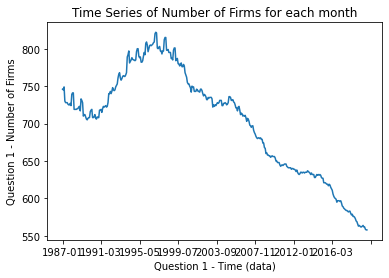

In [53]:
# part (a) --> Time Series of Number of Firms for each month

number_firms = Book_to_Price.apply(lambda x: 1594-x.isna().sum().sum(), axis = 1)
cond_1987 = number_firms.index >='1987-01'
number_firms_1987 = number_firms[cond_1987]
number_firms_1987.plot()
plt.ylabel('Question 1 - Number of Firms')
plt.xlabel('Question 1 - Time (data)')
plt.title('Time Series of Number of Firms for each month')
plt.show()

In [81]:
# part (b) --> the time series of the BP QSpread
def BP_QSpread(final_results):
    final_results = final_results
    top_df = (final_results==4.0).sum(axis=1)
    bottom_df = (final_results==0.0).sum(axis=1)

    bottom_df_ret = (final_results[final_results==0.0]).add(trt1m)
    bottom_df_ret_sum = bottom_df_ret.sum(axis=1)/(bottom_df*100)

    top_df_ret = (final_results[final_results==4.0]-4.0).add(trt1m)
    top_df_ret_sum = top_df_ret.sum(axis=1)/(top_df*100)

    bp_QSpread = top_df_ret_sum.sub(bottom_df_ret_sum)

    cond_1987 = bp_QSpread.index >='1987-01'

    bp_QSpread_1987 = bp_QSpread[cond_1987]

    return bp_QSpread_1987

def BP_QSpread2(final_results,col_names):
    final_results = final_results
    top_df = (final_results==4.0).sum(axis=1)
    bottom_df = (final_results==0.0).sum(axis=1)

    bottom_df_ret = (final_results[final_results==0.0]).add(trt1m)
    bottom_df_ret_sum = bottom_df_ret.sum(axis=1)/(bottom_df*100)

    top_df_ret = (final_results[final_results==4.0]-4.0).add(trt1m)
    top_df_ret_sum = top_df_ret.sum(axis=1)/(top_df*100)

    bp_QSpread = top_df_ret_sum.sub(bottom_df_ret_sum)

    cond_1987 = bp_QSpread.index >='1987-01'

    bp_QSpread_1987 = bp_QSpread[cond_1987]

    return Capital_IQ[col_names]

In [84]:
# part (c)

# define a function to calculate returns of long-leg and short-leg separatly based on a single index
def corr(final_results):


    Top_df = (final_results==4.0).sum(axis=1)
    Top_df_ret = (final_results[final_results==4.0]-4.0).add(trt1m)
    Top_df_ret_sum = Top_df_ret.sum(axis=1)/(Top_df*100)
    
    Bottom_df = (final_results==0.0).sum(axis=1)
    Bottom_df_ret = (final_results[final_results==0.0]).add(trt1m)
    Bottom_df_ret_sum = Bottom_df_ret.sum(axis=1)/(Bottom_df*100)

    ret_df = pd.DataFrame(columns = ['long_return', 'short_return'])
    ret_df['long_return'] = Bottom_df_ret_sum
    ret_df['short_return'] = Top_df_ret_sum
    return ret_df



# Question 2

In [96]:

    
correlation_HL1M = final_results['HL1M'].corr(Capital_IQ['HL1M'])
correlation_LTG = final_results['LTG'].corr(Capital_IQ['LTGC'])
correlation_MOM = final_results['MOM'].corr(Capital_IQ['MOM'])
correlation_BP = final_results['BP'].corr(Capital_IQ['BP'])
correlation_Beta = final_results['Beta'].corr(Capital_IQ['Beta'])
correlation_LogMCap = final_results['LogMCap'].corr(Capital_IQ['LogMktCap'])
correlation_AnnVol12M = final_results['AnnVol12M'].corr(Capital_IQ['AnnVol12M'])


print(abs(correlation_HL1M))
print(correlation_LTG)
print(correlation_MOM)
print(correlation_BP)
print(correlation_Beta)
print(abs(correlation_LogMCap))
print(correlation_AnnVol12M)





0.11833329770898547
0.8730200184577626
0.8891012113534743
0.7989941727291388
0.8981043924865175
0.8446296469394101
0.9368257223801941
